# Objective : Explore features or charecteritics to predict price of car

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

# Analyzing Individual Feature Patterns using Vsulization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

How to choose the right visualization method?

When visualizing individual variables,it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable

In [5]:
df.dtypes # list the data types for each column

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

<AxesSubplot:xlabel='engine-size', ylabel='price'>

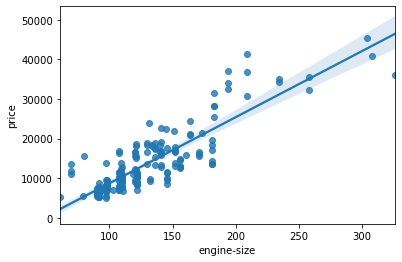

In [6]:
sns.regplot(x='engine-size',y='price',data=df)

As the engine-size goes up, the price goes up: This indicates a positive direct correlation between these two variables.
    Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [7]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


###### Highway mpg is a potential predictor variable of price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

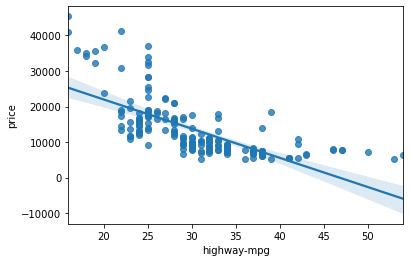

In [8]:
sns.regplot(x='highway-mpg',y='price',data=df)

###### As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price

In [9]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


##### Weak Linear Relationship

#### Let's see if "Peak-rpm" as a predictor variable of "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

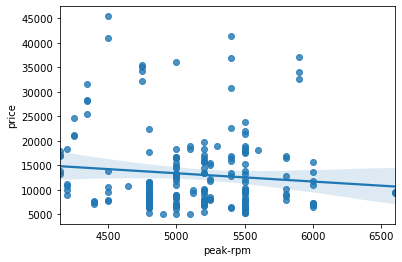

In [10]:
sns.regplot(x='peak-rpm',y='price',data=df)

###### Peak rmp does not seem like a good predictor of the price at all since the regression line is close to horizontal.Also, the data points are very scattered and far from the fitteed line, showing losts of vaiability. Therefore it is not a  reliable variable.

In [11]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


###### Let's see how stroke is correlated with price

<AxesSubplot:xlabel='stroke', ylabel='price'>

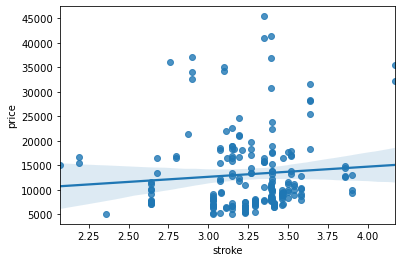

In [12]:
sns.regplot(x='stroke',y='price',data=df)

In [13]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


By looking at the linear equation and correlation we can come to conclution that it has weak relation

In [14]:
#df1=df.select_dtypes(exclude=['object'])
df1=df.select_dtypes(exclude=['object']).columns

In [15]:
print(type(df1))
df1[0:]

<class 'pandas.core.indexes.base.Index'>


Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [16]:
# Lets have all the graphs in one place
df1=df1.drop('price')


In [17]:
# We will check how each column is corelated with price column
df1

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [19]:
# planning to display 3 graphs in 1 row. Let's define number of rows and columns
nrows=int(df1.size/3)
ncolumns=3
nrows,ncolumns

(6, 3)

In [20]:
fig=make_subplots(nrows,ncolumns)

In [26]:
i=0
for j in range(1,nrows+1):
    for k in range(1,ncolumns+1):
        fig.add_trace(go.Scatter(x=df[df1[i]], y=df['price'],mode='markers'),row=j, col=k)
        fig.update_xaxes(title_text=df1[i], row=j, col=k)
        #fig.update_yaxes(title_text='Price', row=j, col=k)
        i=i+1
fig.update_layout(title_text="Side By Side Subplots",height=1200)
fig.show()